In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [2]:
df = pd.read_csv("creditcard.csv")
df.shape

(284807, 31)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Column Details:**

1. **Time:** Represents the number of seconds elapsed from the first transaction in the dataset to the current transaction.

2. **V1-V28:** These columns may reflect the outcome of PCA Dimensionality reduction, implemented to safeguard user identities and protect sensitive features.

3. **Amount:** Indicates the transaction amount.

4. **Class:** This column takes on a value of 1 for fraudulent transactions and 0 for non-fraudulent ones, serving as the dependent variable in our analysis.

## Data Pre-Processing & EDA

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no missing values in the dataset.

We can drop the "Time" column since it is considered irrelevant for our analysis.

In [5]:
df.drop(['Time'], inplace =True, axis=1)

In [6]:
df.shape

(284807, 30)

In [7]:
df['Amount'].describe() #summary of the Amount.

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Let's check if the data is balanced or imbalanced by calculating the percentage of fraudulent transactions.

In [8]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
class_counts = df['Class'].value_counts()
genuine_percentage = (class_counts[0] / len(df)) * 100
fraud_percentage = (class_counts[1] / len(df)) * 100

print("Percentage of Genuine Transactions:", genuine_percentage)
print("Percentage of Fraudulent Transactions:", fraud_percentage)

Percentage of Genuine Transactions: 99.82725143693798
Percentage of Fraudulent Transactions: 0.1727485630620034


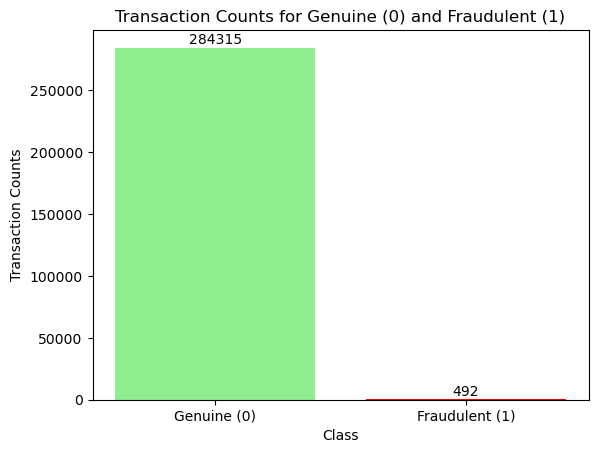

In [10]:
import matplotlib.pyplot as plt
class_counts = df['Class'].value_counts()
# Plotting
plt.bar(['Genuine (0)', 'Fraudulent (1)'], class_counts.values, color=['lightgreen', 'red'])
plt.xlabel('Class')
plt.ylabel('Transaction Counts')
plt.title('Transaction Counts for Genuine (0) and Fraudulent (1)')
for i, count in enumerate(class_counts.values):
    plt.text(i, count + 500, str(count), ha='center', va='bottom')
plt.show()


It is evident from the data that the number of fraudulent transactions is significantly lower than that of genuine transactions, indicating an imbalanced dataset.

To address this, let's apply scaling techniques to the 'Amount' feature, transforming the range of values. This involves dropping the original 'Amount' column and introducing a new column containing the scaled values.

Scaling aims to normalize the data, ensuring a more equitable influence of both features in subsequent analyses or modeling processes.

In [11]:
scaler = StandardScaler()
df['Scaled_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Amount'], inplace =True, axis=1)

In [12]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [13]:
y = df.Class
x = df.drop(['Class'],axis=1)

Dividing the dataset into training and test sets, with 80% of the data allocated for training and the remaining 20% for the test set.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
print("The shape of x_train: ", x_train.shape)
print("The shape of x_test: ",x_test.shape)

The shape of x_train:  (227845, 29)
The shape of x_test:  (56962, 29)


Now, moving forward to train and evaluate newly created models on the dataset, aiming to identify the most effective one.

Begin by training both the decision tree and random forest models on the dataset using the `fit()` function. Capture the predictions generated by the models through the `predict()` function and proceed to the evaluation phase.

Visualizing the performance scores of each credit card fraud classifier will provide a comprehensive understanding of their effectiveness.

In [16]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
y_pred1 = model_dt.predict(x_test)
model_dt_score = model_dt.score(x_test, y_test)*100

In [17]:
#Decision Tree - Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

confusion_matrix_dt = confusion_matrix(y_test,y_pred1.round())
print("Decision Tree - Confusion Matrix: ")
print(confusion_matrix_dt)

Decision Tree - Confusion Matrix: 
[[56838    26]
 [   21    77]]


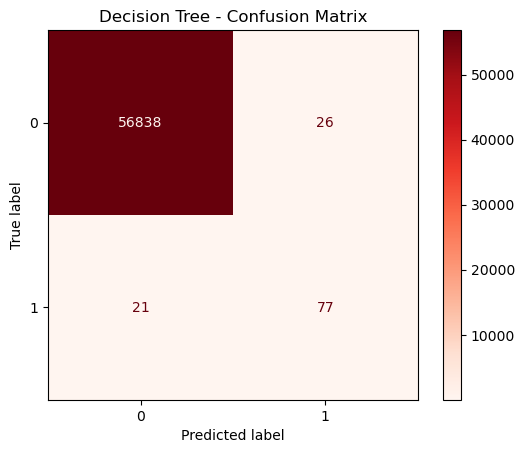

In [18]:
display_labels = [0, 1]
cm_dt = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt, display_labels=display_labels)
cm_dt.plot(cmap='Reds', values_format='d')  
plt.title('Decision Tree - Confusion Matrix')
plt.show()

## DT Performance metrics:

In [19]:
print("Decision Tree score: ", model_dt_score)
print("Evaluation of Decision Tree model: ")
print("Accuracy score: ", accuracy_score(y_test, y_pred1))
print("f1 score: ",f1_score(y_test, y_pred1))
print("Recall: ", recall_score(y_test, y_pred1))
print("Precision score", precision_score(y_test, y_pred1))

Decision Tree score:  99.91748885221726
Evaluation of Decision Tree model: 
Accuracy score:  0.9991748885221726
f1 score:  0.7661691542288557
Recall:  0.7857142857142857
Precision score 0.7475728155339806


Now, let's extend our analysis to the Random Forest model. We will proceed by making predictions and assessing the performance metrics for this ensemble model. 

In [20]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
y_pred2 = model_rf.predict(x_test)
model_rf_score = model_rf.score(x_test, y_test)*100
print("Random Forest score is: ", model_rf_score)

Random Forest score is:  99.95962220427653


In [21]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred2.round())
print("Random Forest - Confusion Matrix: ")
print(confusion_matrix_rf)

Random Forest - Confusion Matrix: 
[[56862     2]
 [   21    77]]


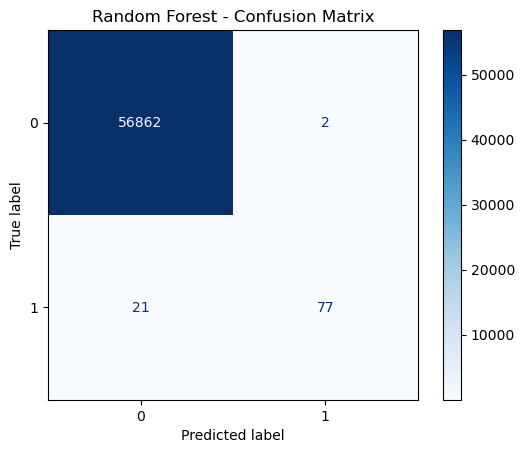

In [22]:
display_labels = [0, 1]
cm_rf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf, display_labels=display_labels)
cm_rf.plot(cmap='Blues', values_format='d')  
plt.title('Random Forest - Confusion Matrix')
plt.show()

## RF Performance metrics:

In [23]:
print("Random Forest score is: ", model_rf_score)
print("Evaluation of Random Forest model: ")
print("Accuracy score: ",accuracy_score(y_test,y_pred2))
print("F1 score: ", f1_score(y_test, y_pred2))
print("Recall score: ", recall_score(y_test,y_pred2))
print("Precision score: ", precision_score(y_test,y_pred2))

Random Forest score is:  99.95962220427653
Evaluation of Random Forest model: 
Accuracy score:  0.9995962220427653
F1 score:  0.8700564971751412
Recall score:  0.7857142857142857
Precision score:  0.9746835443037974


While the performance of the Random Forest model appears promising, let's further evaluate the effectiveness of an additional model to ensure a comprehensive analysis.

In [24]:
from sklearn.linear_model import LogisticRegression

model_lg = LogisticRegression()
model_lg.fit(x_train, y_train)
y_pred3 = model_lg.predict(x_test)
model_lg_score = model_lg.score(x_test, y_test)*100
print("The Logistic Regression model score is: ", model_lg_score)

The Logistic Regression model score is:  99.91222218320986


## Mitigating Class Imbalance in Credit Card Fraud Detection:

While the Random Forest model outperforms others, our dataset grapples with a severe class imbalance issue. Legitimate transactions dominate, comprising over 99%, while credit card fraud transactions are a mere 0.17%. This imbalance can skew the model towards favoring the majority class during training, leading to inflated accuracy.

To tackle this, oversampling the minority class is a solution. We can employ the Synthetic Minority Oversampling Technique (SMOTE) from the imbalanced-learn package. SMOTE generates synthetic examples for the minority class, addressing the data imbalance.

In the following code snippet, we integrate SMOTE to rebalance the dataset. The resampled data is then split using `train_test_split()` with an 80-20 ratio.

In [26]:
from imblearn.over_sampling import SMOTE

x_resampled,y_resampled = SMOTE().fit_resample(x,y)
print("shape of resampled x: ", x_resampled.shape)
print("shape of resampled y: ", y_resampled.shape)

value_counts = Counter(y_resampled)
print(value_counts)

shape of resampled x:  (568630, 29)
shape of resampled y:  (568630,)
Counter({0: 284315, 1: 284315})


In [27]:
#Spiliting the dataset
x_re_train, x_re_test, y_re_train, y_re_test = train_test_split(x_resampled,y_resampled,random_state=42)

The Random Forest model exhibited superior performance; consequently, let us apply it to the resampled dataset for further analysis.

In [28]:
resampled_rf = RandomForestClassifier(n_estimators=100)
resampled_rf.fit(x_re_train, y_re_train)
y_re_pred = resampled_rf.predict(x_re_test)
prediction_resampled_score = resampled_rf.score(x_re_test,y_re_test)*100
print("Prediction score for resampled: ", prediction_resampled_score)

Prediction score for resampled:  99.98874491762687


In [29]:
confusion_matrix_rf_resampled = confusion_matrix(y_re_test,y_re_pred.round())
print("Confusion matrix of resampled data - Random Forest")
print(confusion_matrix_rf_resampled)


Confusion matrix of resampled data - Random Forest
[[71007    16]
 [    0 71135]]


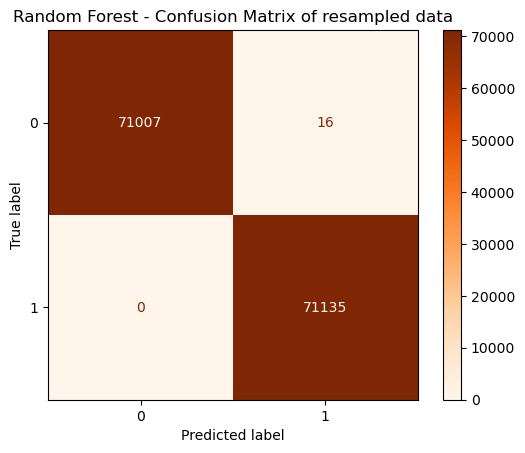

In [31]:
display_labels = [0, 1]
cm_resampled_rf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf_resampled, display_labels=display_labels)
cm_resampled_rf.plot(cmap='Oranges', values_format='d')  
plt.title('Random Forest - Confusion Matrix of resampled data')
plt.show()

In [32]:
print("Evaluation of the random forest model with resampled data: ")
print("Accuracy score: ",accuracy_score(y_re_test,y_re_pred))
print("F1 score: ", f1_score(y_re_test,y_re_pred))
print("Recall score: ", recall_score(y_re_test,y_re_pred))
print("Precision score: ",precision_score(y_re_test,y_re_pred))

Evaluation of the random forest model with resampled data: 
Accuracy score:  0.9998874491762687
F1 score:  0.9998875504266056
Recall score:  1.0
Precision score:  0.9997751261401807


Our Random Forest model, trained on resampled data using SMOTE, has exhibited outstanding performance, notably achieving a perfect Recall score of 1. This signifies the model's remarkable ability to capture all instances of the minority class, affirming its efficacy in addressing imbalanced datasets.